# 📈📉 Product Performance Analysis

## 🎯 Objectives

This notebook explores customer behavior patterns in the e-commerce dataset. The main goals are to:


- Identify quarterly and monthly revenue trends for each category of products and seasonality.
- Identify overall top perfoming products.
- Products by shipping status; and determine revenue "holdbacks".
- Analyze regional trends for categories and products
- Find orders with high revenues that have not been "Delivered".

## 📦 Data Source


The data used here is the cleaned version of the original sales dataset:
- File: `../data/cleaned_orders.csv`
- Format: CSV
- Rows represent individual product orders with associated customer and order details.

## 📊 Data Loading

In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Load data
df = pd.read_csv("../data/cleaned_orders.csv")
df.shape
# df.info()

(810, 18)

In [7]:
# Check for nulls
# df.isna().sum()

In [3]:
# Create a copy of dataframe
df_copy = df.copy()

## Analysis

The different aspects of Product and Category Performance would be analyzed monthly, quarterly and regionally. Products generating high revenues would be considered specially as well.

### Category Revenue Trends

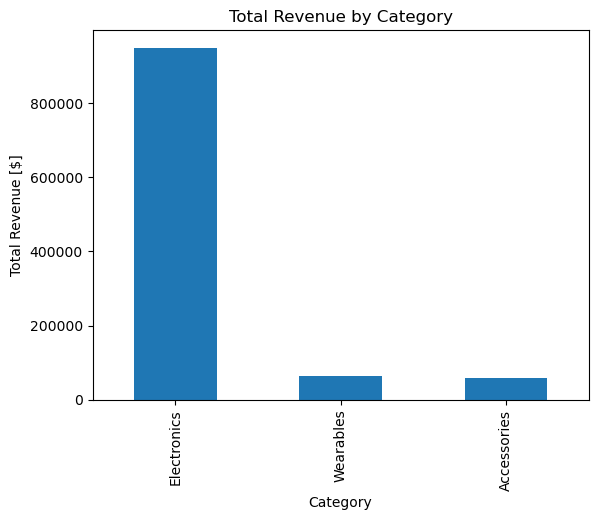

In [4]:
# Group by Category
#  Total Revenue
df_copy.groupby("Category")["Total Price Calc"].sum().sort_values(ascending=False).plot(kind="bar")
plt.title("Total Revenue by Category")
plt.ylabel("Total Revenue [$]")
plt.show();

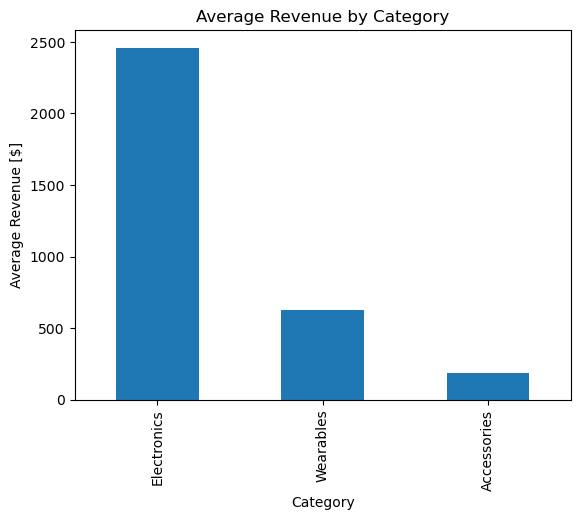

In [5]:
# Average revenue by Category
df_copy.groupby("Category")["Total Price Calc"].mean().sort_values(ascending=False).plot(kind="bar")
plt.title("Average Revenue by Category")
plt.ylabel("Average Revenue [$]")
plt.show();

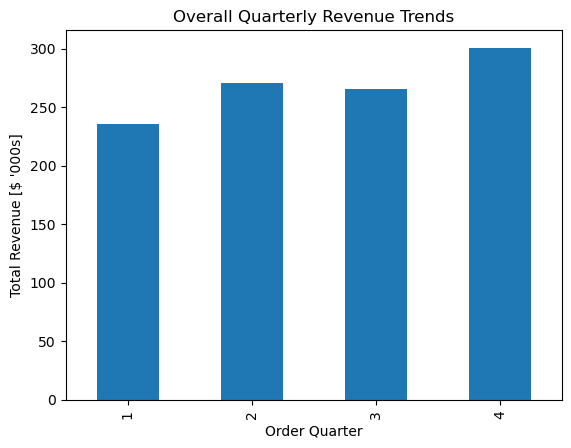

In [30]:
(df_copy.groupby(by="Order Quarter")["Total Price Calc"].sum() / 1e3).plot(kind="bar")
plt.title("Overall Quarterly Revenue Trends")
plt.ylabel("Total Revenue [$ '000s]")
plt.show();

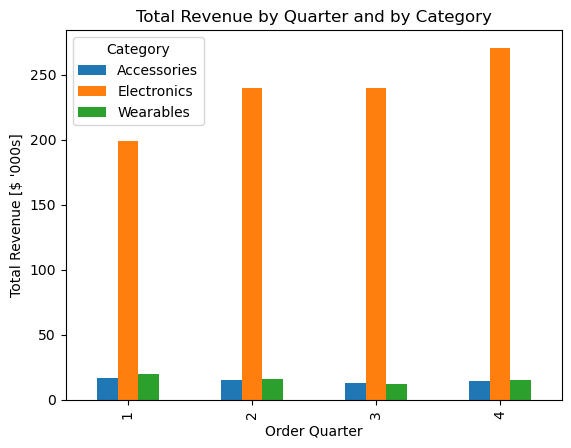

In [33]:
(df_copy.groupby(by=["Order Quarter", "Category"])["Total Price Calc"].sum() / 1e3).unstack().plot(kind="bar")
plt.title("Total Revenue by Quarter and by Category")
plt.ylabel("Total Revenue [$ '000s]")
plt.show();

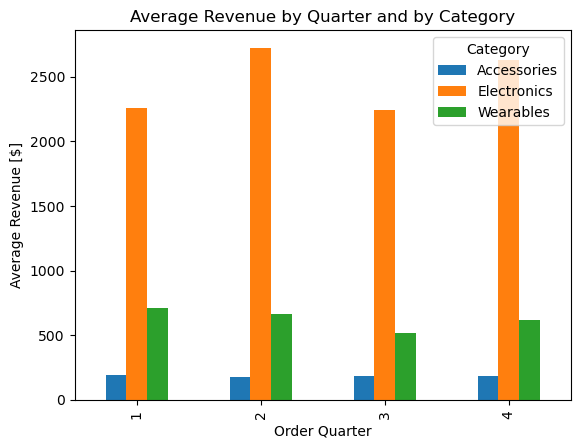

In [35]:
# Quarterly Revenue Trends by Category
df_copy.groupby(by=["Order Quarter", "Category"])["Total Price Calc"].mean().unstack().plot(kind="bar")
plt.title("Average Revenue by Quarter and by Category")
plt.ylabel("Average Revenue [$]")
plt.show();

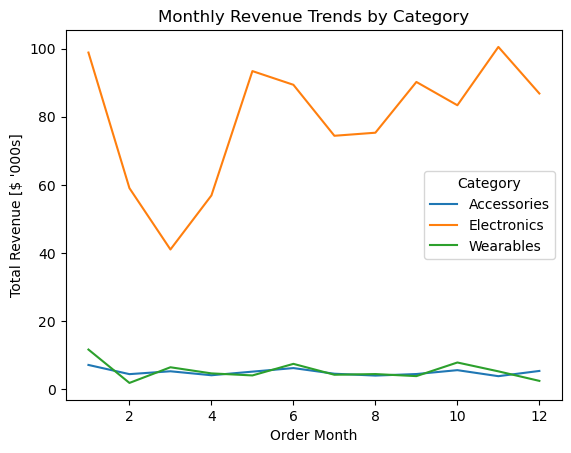

In [41]:
# Monthly Trends Revenue Trends by Category
(df_copy.groupby(by=["Order Month", "Category"])["Total Price Calc"].sum() / 1e3).unstack().plot(kind="line")
plt.title("Monthly Revenue Trends by Category")
plt.ylabel("Total Revenue [$ '000s]")
plt.show();

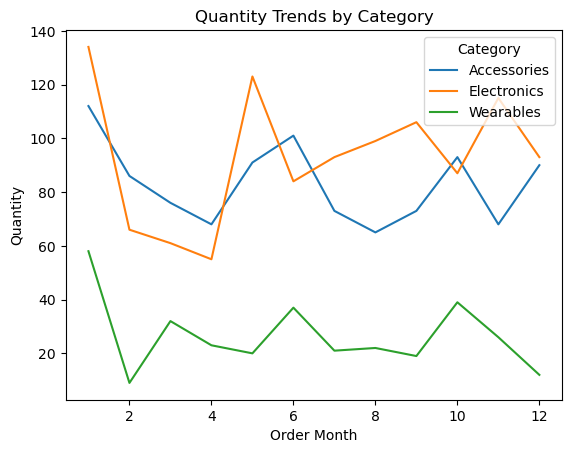

In [45]:
# Monthly Trends Revenue Trends by Category
(df_copy.groupby(by=["Order Month", "Category"])["Quantity"].sum()).unstack().plot(kind="line")
plt.title("Quantity Trends by Category")
plt.ylabel("Quantity")
plt.show();

In [46]:
# df_copy.head()

### Product Revenue Trends

### Products and Shipping Status

### Products and Shipping Fees

In [ ]:
# Pricing and Quantity Ordered

### Regional Trends For Products and Categories

### Product Orders with High revenues

## 📌Summary of Insights

## 📝 Usage Information

This notebook is open for educational and non-commercial use.
Feel free to reuse, modify, or reference this work as part of your learning or projects.